In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
titanic = pd.read_csv('train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic = titanic.drop(columns = "PassengerId")

In [9]:
titanic.drop(['Ticket','Cabin'],inplace=True,axis=1)

In [10]:
titanic = titanic.dropna(subset =['Embarked','Age'])

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Fare      712 non-null    float64
 8   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [12]:
for val in titanic:
   print(titanic[val].value_counts())
   print()

0    424
1    288
Name: Survived, dtype: int64

3    355
1    184
2    173
Name: Pclass, dtype: int64

Braund, Mr. Owen Harris                            1
Kimball, Mr. Edwin Nelson Jr                       1
Chapman, Mr. John Henry                            1
Van Impe, Mr. Jean Baptiste                        1
Johnson, Mr. Alfred                                1
                                                  ..
Allison, Miss. Helen Loraine                       1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1
Johnson, Mr. William Cahoone Jr                    1
Allison, Master. Hudson Trevor                     1
Dooley, Mr. Patrick                                1
Name: Name, Length: 712, dtype: int64

male      453
female    259
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

0    469
1    183
2     25
4     18
3     12
5      5

In [13]:
table = pd.pivot_table(data=titanic,index=['Sex'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.745174,47.332433,0.714286,2.073359,0.644788,0.752896
male,30.726645,27.268836,0.271523,2.335541,0.439294,0.205298


<AxesSubplot:xlabel='Sex'>

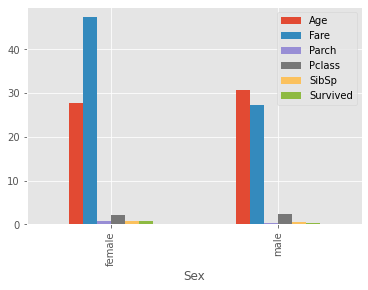

In [14]:
table.plot(kind='bar')

In [15]:
table = pd.pivot_table(data=titanic,index=['Sex'], aggfunc = np.mean)
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.745174,47.332433,0.714286,2.073359,0.644788,0.752896
male,30.726645,27.268836,0.271523,2.335541,0.439294,0.205298


<AxesSubplot:xlabel='Sex'>

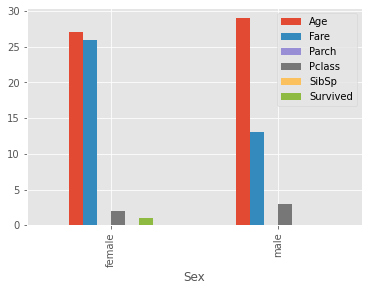

In [19]:
table.plot(kind='bar')

In [21]:
table = pd.pivot_table(titanic,index=['Sex','Embarked'])
table

Age       Fare     Parch    Pclass     SibSp  Survived
Sex    Embarked                                                              
female C         28.344262  79.937502  0.508197  1.639344  0.557377  0.901639
       Q         24.291667  17.363892  0.500000  2.750000  0.166667  0.583333
       S         27.771505  38.572827  0.795699  2.172043  0.704301  0.715054
male   C         32.998841  58.005683  0.333333  1.840580  0.304348  0.347826
       Q         30.937500  18.942187  0.312500  2.812500  1.187500  0.062500
       S         30.291440  21.867706  0.258152  2.407609  0.432065  0.184783

In [25]:
table = pd.pivot_table(titanic,index=['Sex','Pclass'],aggfunc={'Age':np.mean, 'Survived':np.size}) 
table

Age  Survived
Sex    Pclass                     
female 1       34.240964        83
       2       28.722973        74
       3       21.750000       102
male   1       41.281386       101
       2       30.740707        99
       3       26.507589       253

In [26]:
table = pd.pivot_table(data=titanic,index=['Pclass'], columns = ['Embarked'],values = ['Fare'],aggfunc=[np.sum])
table

sum                     
               Fare                     
Embarked          C         Q          S
Pclass                                  
1         8010.2335  180.0000  8010.6208
2          402.1792   24.7000  3287.7000
3          466.1670  306.7417  3923.5408